In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore")
rc = {'font.sans-serif': 'SimHei', 'axes.unicode_minus': False}
sns.set(context="talk", style="ticks", rc=rc)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [14]:
file_path = 'ÈôÑ‰ª∂1 Ëøë5Âπ¥402ÂÆ∂‰æõÂ∫îÂïÜÁöÑÁõ∏ÂÖ≥Êï∞ÊçÆ.xlsx'

order_df = pd.read_excel(file_path, sheet_name='‰ºÅ‰∏öÁöÑËÆ¢Ë¥ßÈáèÔºàm¬≥Ôºâ')
supply_df = pd.read_excel(file_path, sheet_name='‰æõÂ∫îÂïÜÁöÑ‰æõË¥ßÈáèÔºàm¬≥Ôºâ')

order_df.head()

‰æõÂ∫îÂïÜID ÊùêÊñôÂàÜÁ±ª  W001  W002  W003  W004  W005  W006  W007  W008  ...  W231  W232  \
0  S001    B     0     0     0    43     0     0     0     0  ...     1     0   
1  S002    A     1     1     0     1     0     0     0     0  ...     0     0   
2  S003    C     7     1     0     0     0     1     4    50  ...    10     3   
3  S004    B     0     1     1   100     0    85     0     0  ...     1     0   
4  S005    A    30    60    60    60    70    70    60    70  ...    80    70   

   W233  W234  W235  W236  W237  W238  W239  W240  
0     0     1     0     1     0     0     0     0  
1     1     0     0     0     1     1     0     1  
2    50    20    20     7    10     9    20    10  
3     1     0     0     0     0     1     0     0  
4    70    70    70    70    70    70    70    80  

[5 rows x 242 columns]

In [7]:
top_50_suppliers = pd .read_excel("TOPSISÂâç50ÂÆ∂‰æõÂ∫îÂïÜ.xlsx")
top_50_ids = top_50_suppliers['‰æõÂ∫îÂïÜÁºñÂè∑'].head(50).tolist()

# SARIMA

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


def predict_supplier_supply_next_24_weeks(supplier_id, supply_df, plot=True):
    row = supply_df[supply_df.iloc[:, 0] == supplier_id]
    if row.empty:
        raise ValueError(f"Êú™Âú®‰æõË¥ßÈáèË°®‰∏≠ÊâæÂà∞‰æõÂ∫îÂïÜ {supplier_id}")
    supply_series = row.iloc[0, 2:].astype(float).values
    weeks = pd.date_range(start='2017-01-01', periods=len(supply_series), freq='W')
    supply_ts = pd.Series(supply_series, index=weeks)
    order = (1, 1, 1) 
    seasonal_order = (1, 1, 1, 48)

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        model = SARIMAX(supply_ts, order=order, seasonal_order=seasonal_order)
        results = model.fit(disp=False)

    forecast = results.get_forecast(steps=24)
    predicted_supply = forecast.predicted_mean.values
    predicted_supply = np.where(predicted_supply < 0, 0, predicted_supply).astype(int)
    if plot:
        plt.figure(figsize=(12, 6))
        plt.plot(supply_ts[-100:], label='ÂéÜÂè≤‰æõË¥ßÈáè', marker='o', markersize=3)
        future_index = pd.date_range(start=supply_ts.index[-1], periods=25, freq='W')[1:]
        plt.plot(future_index, forecast.predicted_mean, label='È¢ÑÊµã‰æõË¥ßÈáè', color='r', linestyle='--', marker='x', markersize=4)
        pred_ci = forecast.conf_int()
        plt.fill_between(future_index,
                         pred_ci.iloc[:, 0], pred_ci.iloc[:, 1],
                         color='pink', alpha=0.3, label='95% ÁΩÆ‰ø°Âå∫Èó¥')
        plt.title(f'‰æõÂ∫îÂïÜ {supplier_id} ÁöÑ‰æõË¥ßÈáèÈ¢ÑÊµã')
        plt.xlabel('Êó∂Èó¥')
        plt.ylabel('‰æõË¥ßÈáè ($m^3$)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return predicted_supply

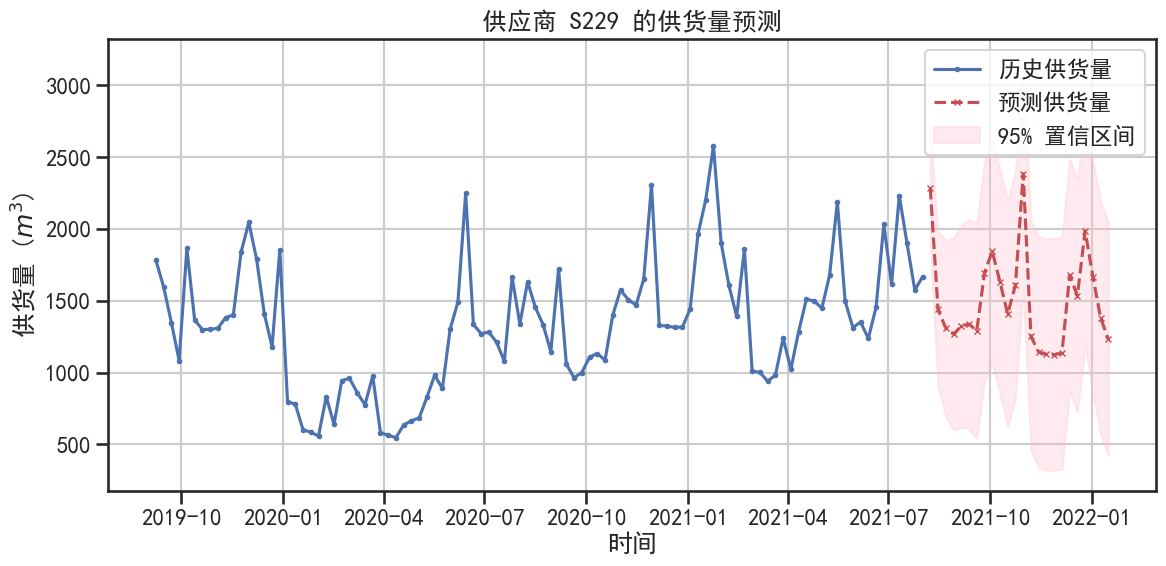

S229Êú™Êù• 24Âë®‰æõË¥ßÈáèÈ¢ÑÊµãÁªìÊûúÔºö [2285 1439 1309 1267 1321 1336 1291 1691 1844 1630 1406 1609 2382 1251
 1142 1126 1124 1134 1676 1534 1984 1666 1379 1230]


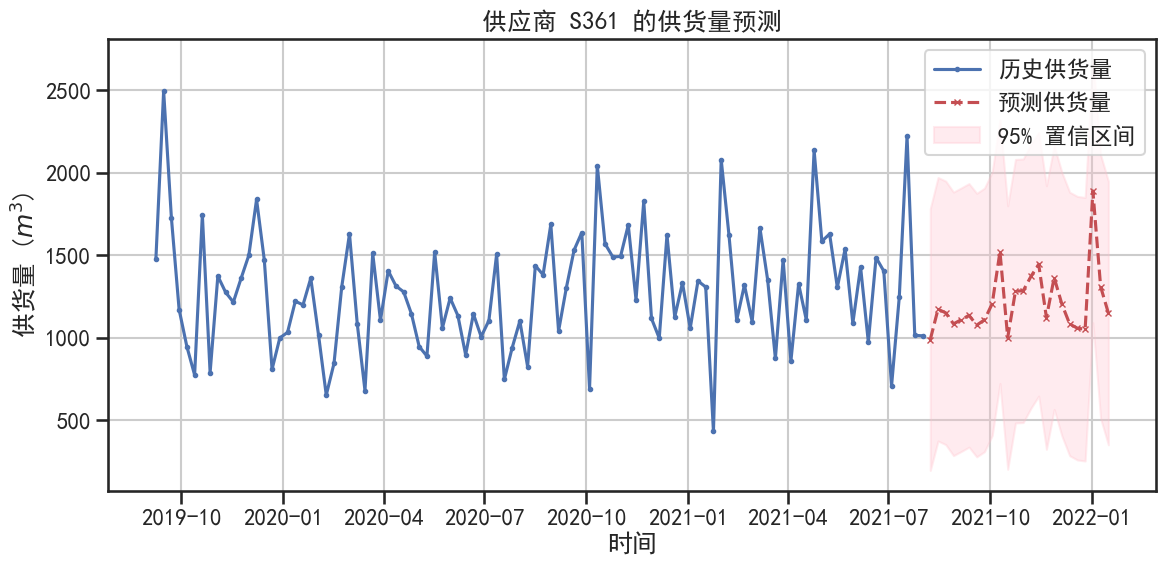

S361Êú™Êù• 24Âë®‰æõË¥ßÈáèÈ¢ÑÊµãÁªìÊûúÔºö [ 989 1173 1151 1084 1109 1136 1077 1108 1206 1521 1001 1282 1284 1371
 1445 1122 1364 1203 1083 1058 1051 1889 1309 1149]


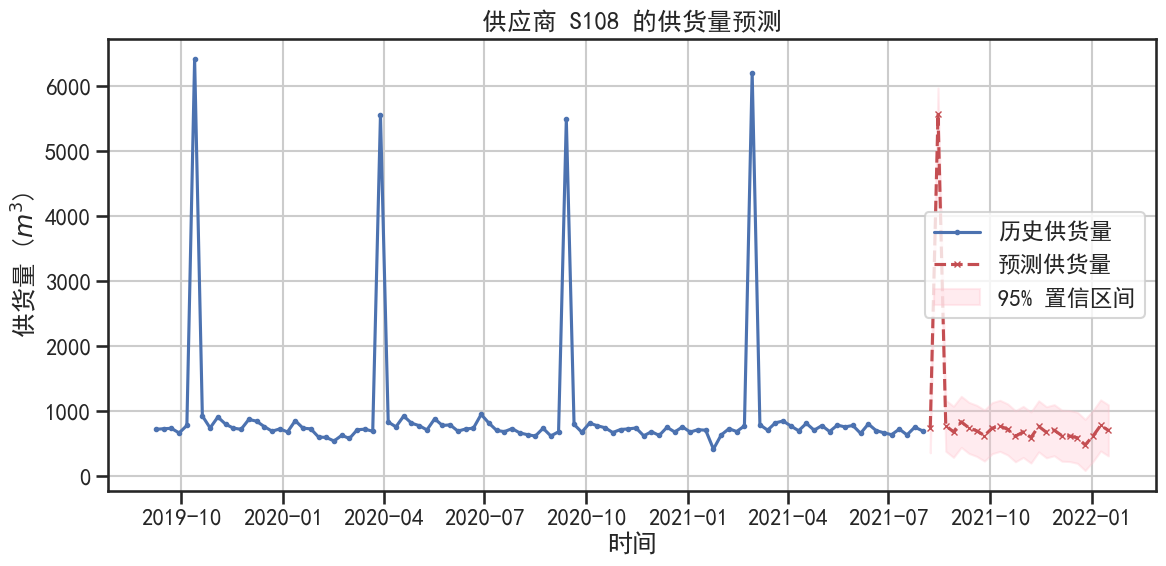

S108Êú™Êù• 24Âë®‰æõË¥ßÈáèÈ¢ÑÊµãÁªìÊûúÔºö [ 748 5580  776  682  837  743  698  626  740  775  719  614  682  595
  767  676  708  624  618  592  481  616  781  705]


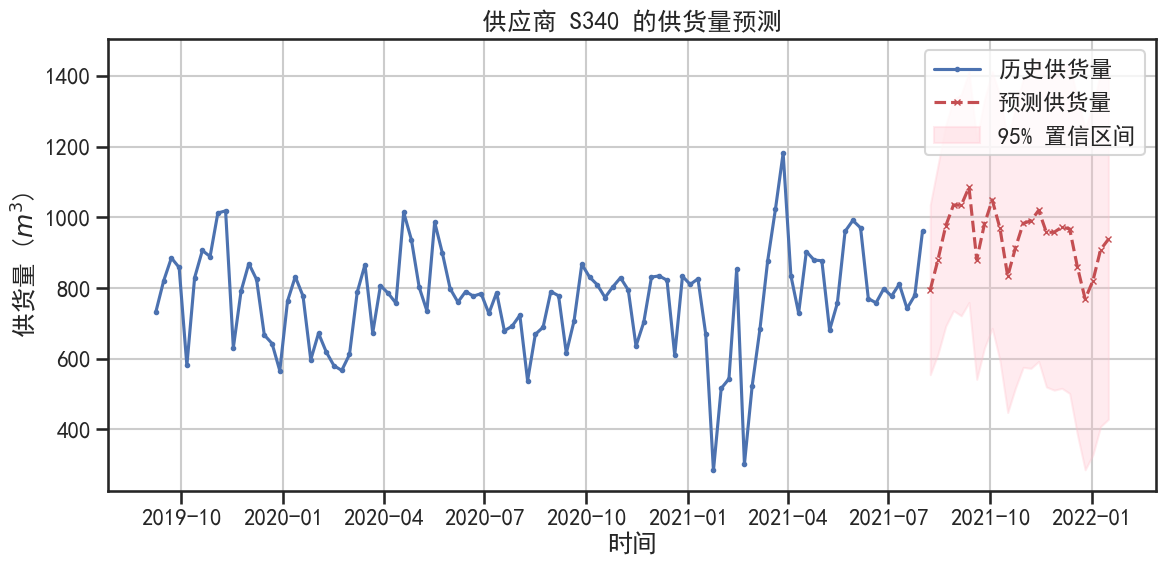

S340Êú™Êù• 24Âë®‰æõË¥ßÈáèÈ¢ÑÊµãÁªìÊûúÔºö [ 794  880  975 1034 1033 1084  880  981 1048  968  833  913  982  989
 1019  957  957  972  966  859  769  819  908  937]


In [6]:
for i in range(4):
    supplier_id = top_50_ids[i]
    forecast_supply = predict_supplier_supply_next_24_weeks(supplier_id, supply_df)
    print(f"{ supplier_id}Êú™Êù• 24Âë®‰æõË¥ßÈáèÈ¢ÑÊµãÁªìÊûúÔºö", forecast_supply)

## È¢ÑÊµãTOP50‰æõË¥ßÂïÜÁöÑ‰æõË¥ßÈáè

In [12]:
future_weeks = [f'W{i}' for i in range(241, 265)]  # W241~W264
result_df = pd.DataFrame(columns=['‰æõÂ∫îÂïÜÁºñÂè∑', 'ÊùêÊñôÂàÜÁ±ª'] + future_weeks)

top_50_ids = top_50_suppliers['‰æõÂ∫îÂïÜÁºñÂè∑'].tolist()
top_50_supply_sorted = pd.DataFrame()

for supplier_id in top_50_ids:
    match_row = supply_df[supply_df.iloc[:, 0] == supplier_id]
    if not match_row.empty:
        top_50_supply_sorted = pd.concat([top_50_supply_sorted, match_row], ignore_index=True)

for idx in tqdm(range(len(top_50_supply_sorted)), desc="È¢ÑÊµã‰æõÂ∫îÂïÜ‰æõË¥ßÈáè"):
    row = top_50_supply_sorted.iloc[idx]
    supplier_id = row.iloc[0]
    category = row.iloc[1]

    try:
        prediction = predict_supplier_supply_next_24_weeks(supplier_id, supply_df,  plot=False)
        new_row = pd.DataFrame([[
            supplier_id,
            category,
            *prediction.tolist()
        ]], columns=result_df.columns)

        result_df = pd.concat([result_df, new_row], ignore_index=True)

    except Exception as e:
        print(f"error: {e}")

È¢ÑÊµã‰æõÂ∫îÂïÜ‰æõË¥ßÈáè: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [05:35<00:00,  6.70s/it]


In [13]:
result_df.to_excel("‰æõÂ∫îÂïÜ‰æõË¥ßÈáèÈ¢ÑÊµãÁªìÊûú.xlsx", index=False) # ‰øùÂ≠ò

# SARIMAËÆ¢Ë¥ßÈáèÔºàABCÔºâ

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def predict_weekly_order_for_category(ts_series, steps=24, order=(1, 1, 1), seasonal_order=(1, 1, 1, 48)):
    model = SARIMAX(ts_series, order=order, seasonal_order=seasonal_order)
    result = model.fit(disp=False)
    forecast = result.get_forecast(steps=steps)
    predicted_mean = forecast.predicted_mean.values
    predicted_mean = np.where(predicted_mean < 0, 0, predicted_mean)  # ÊõøÊç¢Ë¥üÂÄº‰∏∫0
    return forecast.predicted_mean, forecast.conf_int()

In [36]:
warnings.filterwarnings("ignore")
week_columns = [f'W{i:03d}' for i in range(1, 241)]  # ['W001', 'W002', ..., 'W240']
abc_order_data = order_df.groupby('ÊùêÊñôÂàÜÁ±ª')[week_columns].sum().loc[['A', 'B', 'C']]
weeks = pd.date_range(start='2017-01-01', periods=240, freq='W')
abc_order_ts = pd.DataFrame({
    'A': abc_order_data.loc['A'].values,
    'B': abc_order_data.loc['B'].values,
    'C': abc_order_data.loc['C'].values
}, index=weeks)

future_weeks = pd.date_range(start=weeks[-1] + pd.Timedelta(days=7), periods=24, freq='W')
predicted_means = {}
conf_ints = {}

for category in ['A', 'B', 'C']:
    mean, ci = predict_weekly_order_for_category(abc_order_ts[category], steps=24)
    predicted_means[category] = mean.values
    conf_ints[category] = ci.values

predicted_df = pd.DataFrame({f'{cat}Á±ªÈ¢ÑÊµãËÆ¢Ë¥ßÈáè': predicted_means[cat] for cat in ['A', 'B', 'C']}, index=future_weeks)
new_index = [f"W{i}" for i in range(241, 265)]
predicted_df["Week"] = new_index
print(predicted_df)
predicted_df.to_excel("È¢ÑÊµãËÆ¢Ë¥ßÈáèÁªìÊûú.xlsx", index=False)

                 AÁ±ªÈ¢ÑÊµãËÆ¢Ë¥ßÈáè       BÁ±ªÈ¢ÑÊµãËÆ¢Ë¥ßÈáè       CÁ±ªÈ¢ÑÊµãËÆ¢Ë¥ßÈáè  Week
2021-08-08   4658.146579  23632.355345   9691.054561  W241
2021-08-15   4815.123778  11952.676109   9005.842898  W242
2021-08-22   1917.626707  13084.362198   9779.684445  W243
2021-08-29   3953.147482  10808.663645   9597.281450  W244
2021-09-05   2514.106232  21425.357952   8642.340188  W245
2021-09-12   9054.087383   6760.955054   8762.998507  W246
2021-09-19   7019.144571   9241.862500   9220.753600  W247
2021-09-26  14168.890997  11459.136345   9546.202245  W248
2021-10-03   6894.856231  14031.052030   9971.954958  W249
2021-10-10   9542.631174   9268.132918  10728.368956  W250
2021-10-17   4863.380338   6641.451672  12102.029425  W251
2021-10-24   4878.635914   7402.576263  12178.129146  W252
2021-10-31   6633.523936   9982.221067  11647.298666  W253
2021-11-07   7157.215147   5898.435957  11750.085414  W254
2021-11-14   5023.558017   7631.241994  12264.247487  W255
2021-11-21   4450.86

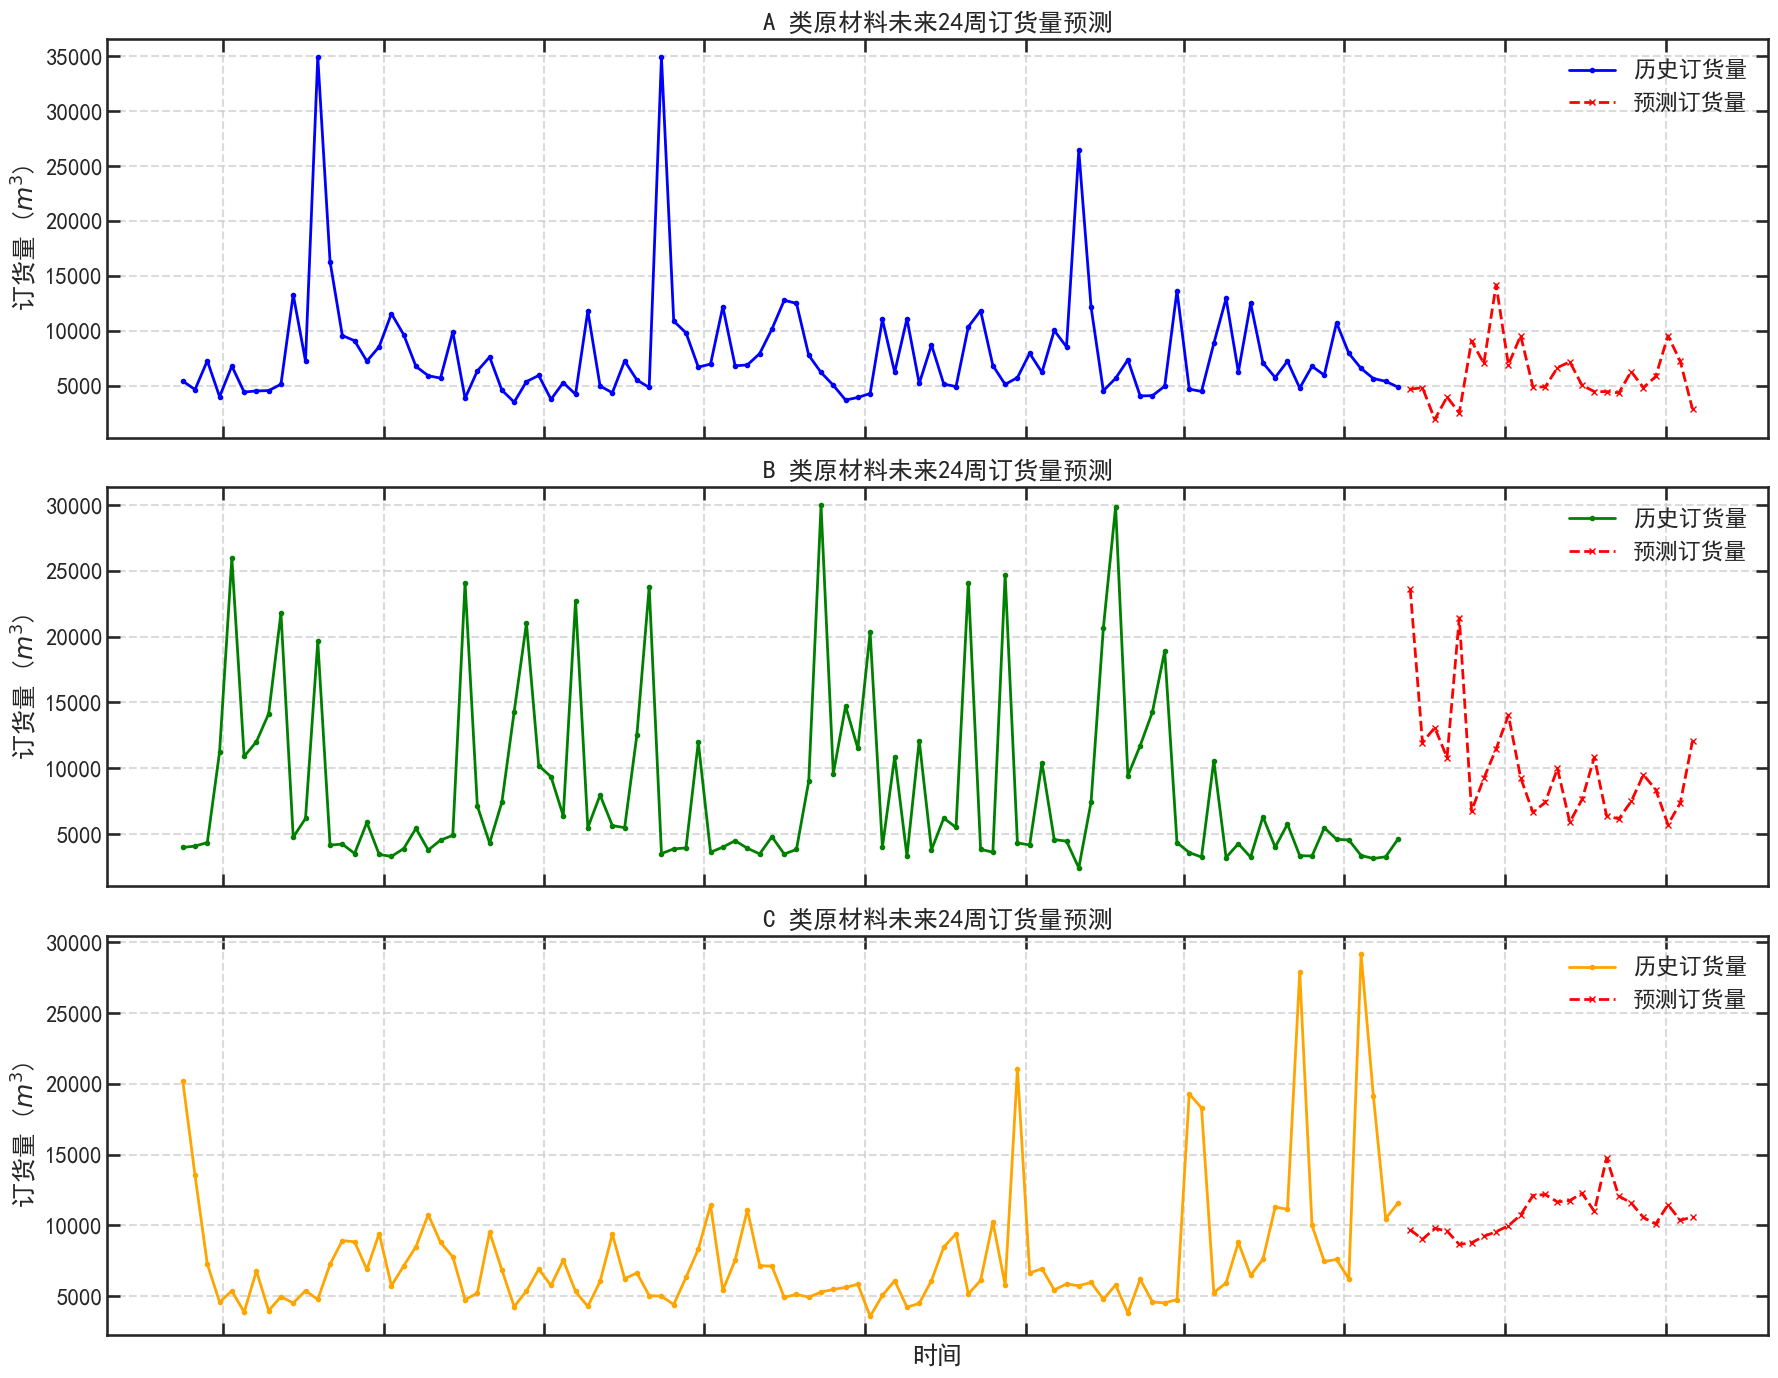

In [22]:
plt.rcParams.update({
    'font.size': 14,
    'lines.linewidth': 2,
    'lines.markersize': 6,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.top': True,
    'ytick.right': True,
    'axes.spines.top': True,
    'axes.spines.right': True,
    'legend.frameon': False,
    'axes.grid': True,
    'grid.linestyle': '--',
    'grid.alpha': 0.7
})
fig, axes = plt.subplots(3, 1, figsize=(18, 14), sharex=True)
colors = {'A': 'blue', 'B': 'green', 'C': 'orange'}
categories = ['A', 'B', 'C']

for ax, category in zip(axes, categories):
    ax.plot(abc_order_ts.index[-100:], abc_order_ts[category][-100:], label='ÂéÜÂè≤ËÆ¢Ë¥ßÈáè', color=colors[category], marker='o', markersize=3)
    future_index = predicted_df.index
    ax.plot(future_index, predicted_df[f'{category}Á±ªÈ¢ÑÊµãËÆ¢Ë¥ßÈáè'], label='È¢ÑÊµãËÆ¢Ë¥ßÈáè', color='red', linestyle='--', marker='x', markersize=5)

    ax.set_title(f'{category} Á±ªÂéüÊùêÊñôÊú™Êù•24Âë®ËÆ¢Ë¥ßÈáèÈ¢ÑÊµã')
    ax.set_ylabel('ËÆ¢Ë¥ßÈáè ($m^3$)')
    ax.legend()
    ax.grid(True)
    ax.xaxis.set_ticklabels([])

plt.xlabel("Êó∂Èó¥")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Âπ≥ÂùáÊçüËÄóÈáèÊõ≤Á∫ø

In [40]:
loss_df = pd.read_excel("ÈôÑ‰ª∂2 Ëøë5Âπ¥8ÂÆ∂ËΩ¨ËøêÂïÜÁöÑÁõ∏ÂÖ≥Êï∞ÊçÆ.xlsx")
week_columns = [f'W{i:03d}' for i in range(1, 241)]
loss_data = loss_df[week_columns].values.T
weeks = pd.date_range(start='2017-01-01', periods=240, freq='W')
loss_ts = pd.DataFrame(loss_data, index=weeks, columns=loss_df['ËΩ¨ËøêÂïÜID'])
weekly_avg_loss = loss_ts.mean(axis=1)
avg_loss_series = pd.Series(weekly_avg_loss.values, index=weekly_avg_loss.index)
from statsmodels.tsa.statespace.sarimax import SARIMAX

def sarima_forecast(ts_series, steps=24):
    order = (1, 1, 1)
    seasonal_order = (2, 1, 1, 48)

    model = SARIMAX(ts_series, order=order, seasonal_order=seasonal_order)
    result = model.fit(disp=False)
    forecast = result.get_forecast(steps=steps)

    predicted_mean = forecast.predicted_mean.values
    return predicted_mean


predicted_loss = sarima_forecast(avg_loss_series, steps=24)

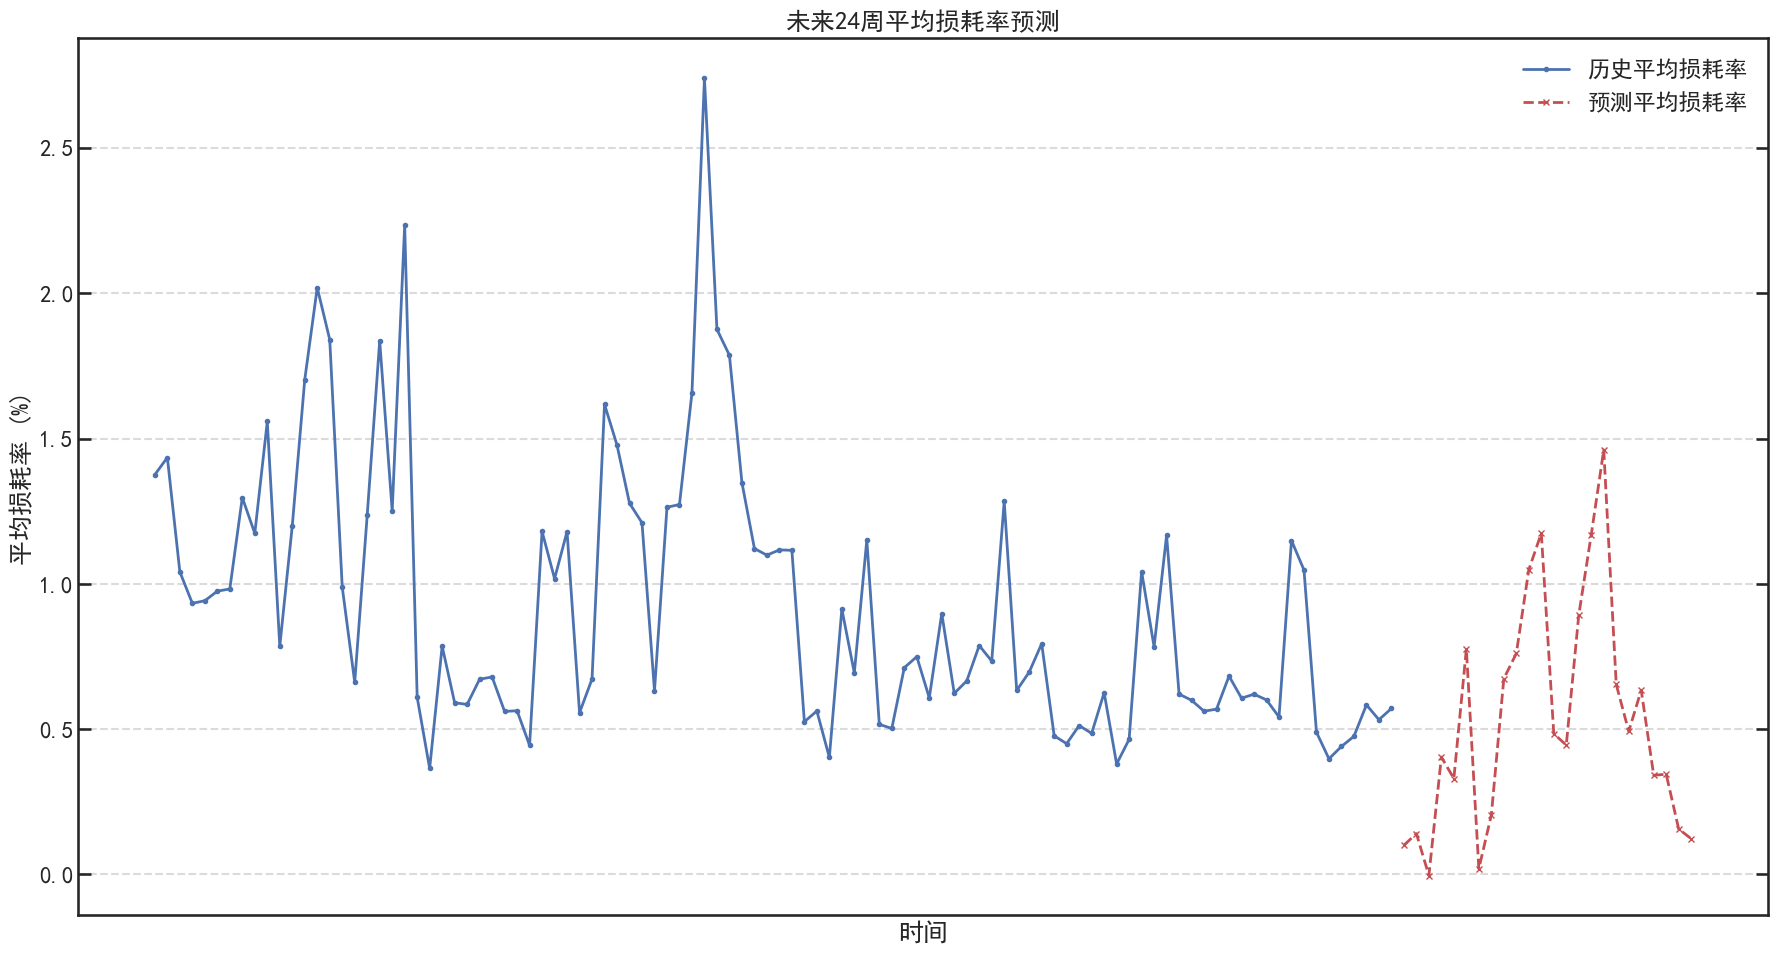

    Week  È¢ÑÊµãÂπ≥ÂùáÊçüËÄóÁéá (%)
0   W241     0.100171
1   W242     0.140154
2   W243    -0.004189
3   W244     0.403555
4   W245     0.329741
5   W246     0.775342
6   W247     0.019227
7   W248     0.204451
8   W249     0.673580
9   W250     0.760287
10  W251     1.048706
11  W252     1.174280
12  W253     0.484042
13  W254     0.444979
14  W255     0.892838
15  W256     1.169234
16  W257     1.461231
17  W258     0.653541
18  W259     0.492309
19  W260     0.634007
20  W261     0.341094
21  W262     0.344470
22  W263     0.156114
23  W264     0.122511


In [42]:
plt.rcParams.update({
    'font.size': 14,
    'lines.linewidth': 2,
    'lines.markersize': 6,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.top': True,
    'ytick.right': True,
    'axes.spines.top': True,
    'axes.spines.right': True,
    'legend.frameon': False,
    'axes.grid': True,
    'grid.linestyle': '--',
    'grid.alpha': 0.7
})
plt.figure(figsize=(18, 10))
plt.plot(avg_loss_series[-100:], label='ÂéÜÂè≤Âπ≥ÂùáÊçüËÄóÁéá', marker='o', markersize=3)
plt.plot(future_index, predicted_loss, label='È¢ÑÊµãÂπ≥ÂùáÊçüËÄóÁéá', color='r', linestyle='--', marker='x', markersize=5)

plt.title("Êú™Êù•24Âë®Âπ≥ÂùáÊçüËÄóÁéáÈ¢ÑÊµã")
plt.xlabel("Êó∂Èó¥")
plt.ylabel("Âπ≥ÂùáÊçüËÄóÁéá (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks([])
plt.show()

new_index = [f"W{i}" for i in range(241, 265)]
loss_predicted_df = pd.DataFrame({
    'Week': new_index,
    'È¢ÑÊµãÂπ≥ÂùáÊçüËÄóÁéá (%)': predicted_loss
})
print(loss_predicted_df)

# ÈÅó‰º†ÁÆóÊ≥ïÊúÄ‰ºòÂåñ

In [70]:
df_demand = pd.read_excel("È¢ÑÊµãËÆ¢Ë¥ßÈáèÁªìÊûú.xlsx")
demand_A = df_demand["AÁ±ªÈ¢ÑÊµãËÆ¢Ë¥ßÈáè"].values
demand_B = df_demand["BÁ±ªÈ¢ÑÊµãËÆ¢Ë¥ßÈáè"].values
demand_C = df_demand["CÁ±ªÈ¢ÑÊµãËÆ¢Ë¥ßÈáè"].values
loss_rates = loss_predicted_df["È¢ÑÊµãÂπ≥ÂùáÊçüËÄóÁéá (%)"].values
df_suppliers = pd.read_excel("‰æõÂ∫îÂïÜ‰æõË¥ßÈáèÈ¢ÑÊµãÁªìÊûú.xlsx")
supplier_ids = df_suppliers["‰æõÂ∫îÂïÜÁºñÂè∑"].tolist()
materials = df_suppliers["ÊùêÊñôÂàÜÁ±ª"].tolist()
weeks = [f"W{i}" for i in range(241, 265)]
supply_data = df_suppliers[weeks].values 

In [71]:
def get_supply(individual, week):
    """ËÆ°ÁÆóËØ•‰∏™‰ΩìÂú®Á¨¨ week Âë®ÂØπ A/B/C ÁöÑÊÄª‰æõË¥ßÈáè"""
    supply = {"A": 0, "B": 0, "C": 0}
    selected = [i for i in range(50) if individual[i] == 1]
    for idx in selected:
        mat = materials[idx]
        supply[mat] += supply_data[idx][week]
    return supply

In [77]:
demand_A

array([ 4658.14657874,  4815.1237783 ,  1917.62670742,  3953.14748193,
        2514.10623151,  9054.08738349,  7019.14457132, 14168.89099706,
        6894.85623065,  9542.63117428,  4863.38033796,  4878.6359144 ,
        6633.52393567,  7157.21514725,  5023.55801656,  4450.8686554 ,
        4445.0702023 ,  4330.32540058,  6275.58553218,  4805.02866743,
        5823.1750581 ,  9536.16363462,  7216.84448348,  2853.77804523])

In [79]:
demand_B

array([23632.35534492, 11952.67610934, 13084.3621984 , 10808.66364538,
       21425.3579523 ,  6760.95505444,  9241.86250001, 11459.13634502,
       14031.05203031,  9268.13291827,  6641.45167197,  7402.57626337,
        9982.22106743,  5898.43595703,  7631.24199407, 10826.81625666,
        6384.10259473,  6151.39854109,  7475.57696956,  9503.95437589,
        8380.78031296,  5723.39838891,  7350.2501819 , 12070.35679396])

In [80]:
demand_C

array([ 9691.05456145,  9005.8428978 ,  9779.68444543,  9597.28145   ,
        8642.34018843,  8762.99850729,  9220.75359993,  9546.20224521,
        9971.95495818, 10728.36895601, 12102.02942512, 12178.12914576,
       11647.29866625, 11750.0854138 , 12264.24748719, 10993.10555754,
       14751.32692977, 12059.39806669, 11586.99052778, 10554.86405459,
       10089.87960863, 11455.40907375, 10352.09214999, 10588.51006283])

In [78]:
get_supply(np.ones(50, dtype=int), 0)

{'A': 7443, 'B': 26947, 'C': 8580}

In [84]:
def fitness(individual, week):
    loss = loss_rates[week]
    demand = {
        "A": demand_A[week],
        "B": demand_B[week],
        "C": demand_C[week]
    }

    supply = get_supply(individual, week)
    received_A = supply["A"] * (1 - loss)
    received_B = supply["B"] * (1 - loss)
    received_C = supply["C"] * (1 - loss)

    shortage_penalty = 0
    if received_A < demand["A"]:
        shortage_penalty += (demand["A"] - received_A) ** 2
    if received_B < demand["B"]:
        shortage_penalty += (demand["B"] - received_B) ** 2
    if received_C < demand["C"]:
        shortage_penalty += (demand["C"] - received_C) ** 2

    if shortage_penalty == 0:
        return sum(individual)  # ÊàêÊú¨Ôºö‰æõÂ∫îÂïÜÊï∞Èáè
    else:
        return 1000 + shortage_penalty * 0.1  # ÊÉ©ÁΩöÈ°πÊõø‰ª£ inf

In [88]:
def genetic_algorithm(week, pop_size=100, generations=100, mutation_rate=0.05):

    print(f"\n=== ÂºÄÂßãÂ§ÑÁêÜÁ¨¨ {week+1} Âë®Ôºà{weeks[week]}Ôºâ ===")

    population = np.random.randint(0, 2, size=(pop_size, 50))

    for gen in range(generations):
        scores = np.array([fitness(ind, week) for ind in population])

        best_idx = np.argmin(scores)
        best_ind = population[best_idx]
        best_score = scores[best_idx]
        if gen % 10 == 0 or gen == generations - 1:
            print(f"Generation {gen}: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = {best_score:.2f}")

        selected_indices = np.argsort(scores)[:int(pop_size * 0.2)]
        parents = population[selected_indices]

        offspring = []
        while len(offspring) < pop_size:
            p1, p2 = parents[np.random.choice(len(parents), 2, replace=False)]
            crossover_point = np.random.randint(1, 49)
            child = np.concatenate((p1[:crossover_point], p2[crossover_point:]))
            offspring.append(child)

        for i in range(len(offspring)):
            if np.random.rand() < mutation_rate:
                idx = np.random.randint(0, 50)
                offspring[i][idx] ^= 1  # ÁøªËΩ¨‰Ωç

        population = np.array(offspring)

    final_scores = np.array([fitness(ind, week) for ind in population])
    best_idx = np.argmin(final_scores)
    best_individual = population[best_idx]
    num_suppliers = sum(best_individual)
    selected_suppliers = [supplier_ids[i] for i in range(50) if best_individual[i] == 1]

    print(f"\n‚úÖ Á¨¨ {week+1} Âë®ÊúÄ‰ºòËß£:")
    print(f"üìå ‰æõÂ∫îÂïÜÊï∞Èáè: {num_suppliers}")
    print(f"üìå ÈÄâ‰∏≠ÁöÑ‰æõÂ∫îÂïÜ: {selected_suppliers}")

    return {
        "week": weeks[week],
        "num_suppliers": num_suppliers,
        "selected_suppliers": selected_suppliers
    }

In [90]:
a = genetic_algorithm(0)


=== ÂºÄÂßãÂ§ÑÁêÜÁ¨¨ 1 Âë®ÔºàW241Ôºâ ===
Generation 0: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 1381338.60
Generation 10: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 438605.70
Generation 20: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 390406.97
Generation 30: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 389295.51
Generation 40: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 389295.51
Generation 50: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 389295.51
Generation 60: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 389295.51
Generation 70: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 389295.51
Generation 80: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 389295.51
Generation 90: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 389295.51
Generation 99: ÊúÄ‰ºòÈÄÇÂ∫îÂ∫¶ = 389295.51

‚úÖ Á¨¨ 1 Âë®ÊúÄ‰ºòËß£:
üìå ‰æõÂ∫îÂïÜÊï∞Èáè: 39
üìå ÈÄâ‰∏≠ÁöÑ‰æõÂ∫îÂïÜ: ['S229', 'S361', 'S108', 'S340', 'S282', 'S329', 'S131', 'S151', 'S330', 'S268', 'S306', 'S356', 'S194', 'S139', 'S352', 'S143', 'S395', 'S037', 'S374', 'S284', 'S247', 'S140', 'S365', 'S338', 'S031', 'S040', 'S364', 'S055', 'S086', 'S367', 'S114', 'S294', 'S080', 'S244', 'S218', 'S074', 'S210', 'S189', 'S078']
